Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app=pd.read_csv("application_data.csv")
prev_app=pd.read_csv("previous_application.csv")

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
missing_info=pd.DataFrame(app.isnull().sum().sort_values()).reset_index().rename(columns={'index':'col_name', 0:'null_cnt'})
missing_info.head()

,col_name,null_cnt
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [5]:
missing_info['missing_pcnt']=missing_info['null_cnt']/app.shape[0]*100
missing_info

,col_name,null_cnt,missing_pcnt
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...,...
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
118,NONLIVINGAPARTMENTS_MODE,213514,69.432963
119,COMMONAREA_MODE,214865,69.872297
120,COMMONAREA_AVG,214865,69.872297


In [6]:
missing_info.to_excel("D:\Loan Defaulter Dataset\Missing_Info.xlsx", index='False')
missing_info.head()

PermissionError: [Errno 13] Permission denied: 'D:\\Loan Defaulter Dataset\\Missing_Info.xlsx'

In [7]:
missing_cols=missing_info[missing_info['missing_pcnt']>=40]['col_name'].to_list()

In [8]:
app_missing_rmvd=app.drop(labels=missing_cols, axis=1)
# app_missing_rmvd1=app.drop(labels=missing_cols, axis=1)

In [9]:
flag_cols=[]
for col in app_missing_rmvd.columns:
    if(col.startswith('FLAG_')):
        flag_cols.append(col)

flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [10]:
flag_tgt_cols=app_missing_rmvd[flag_cols+['TARGET']]
flag_tgt_cols.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


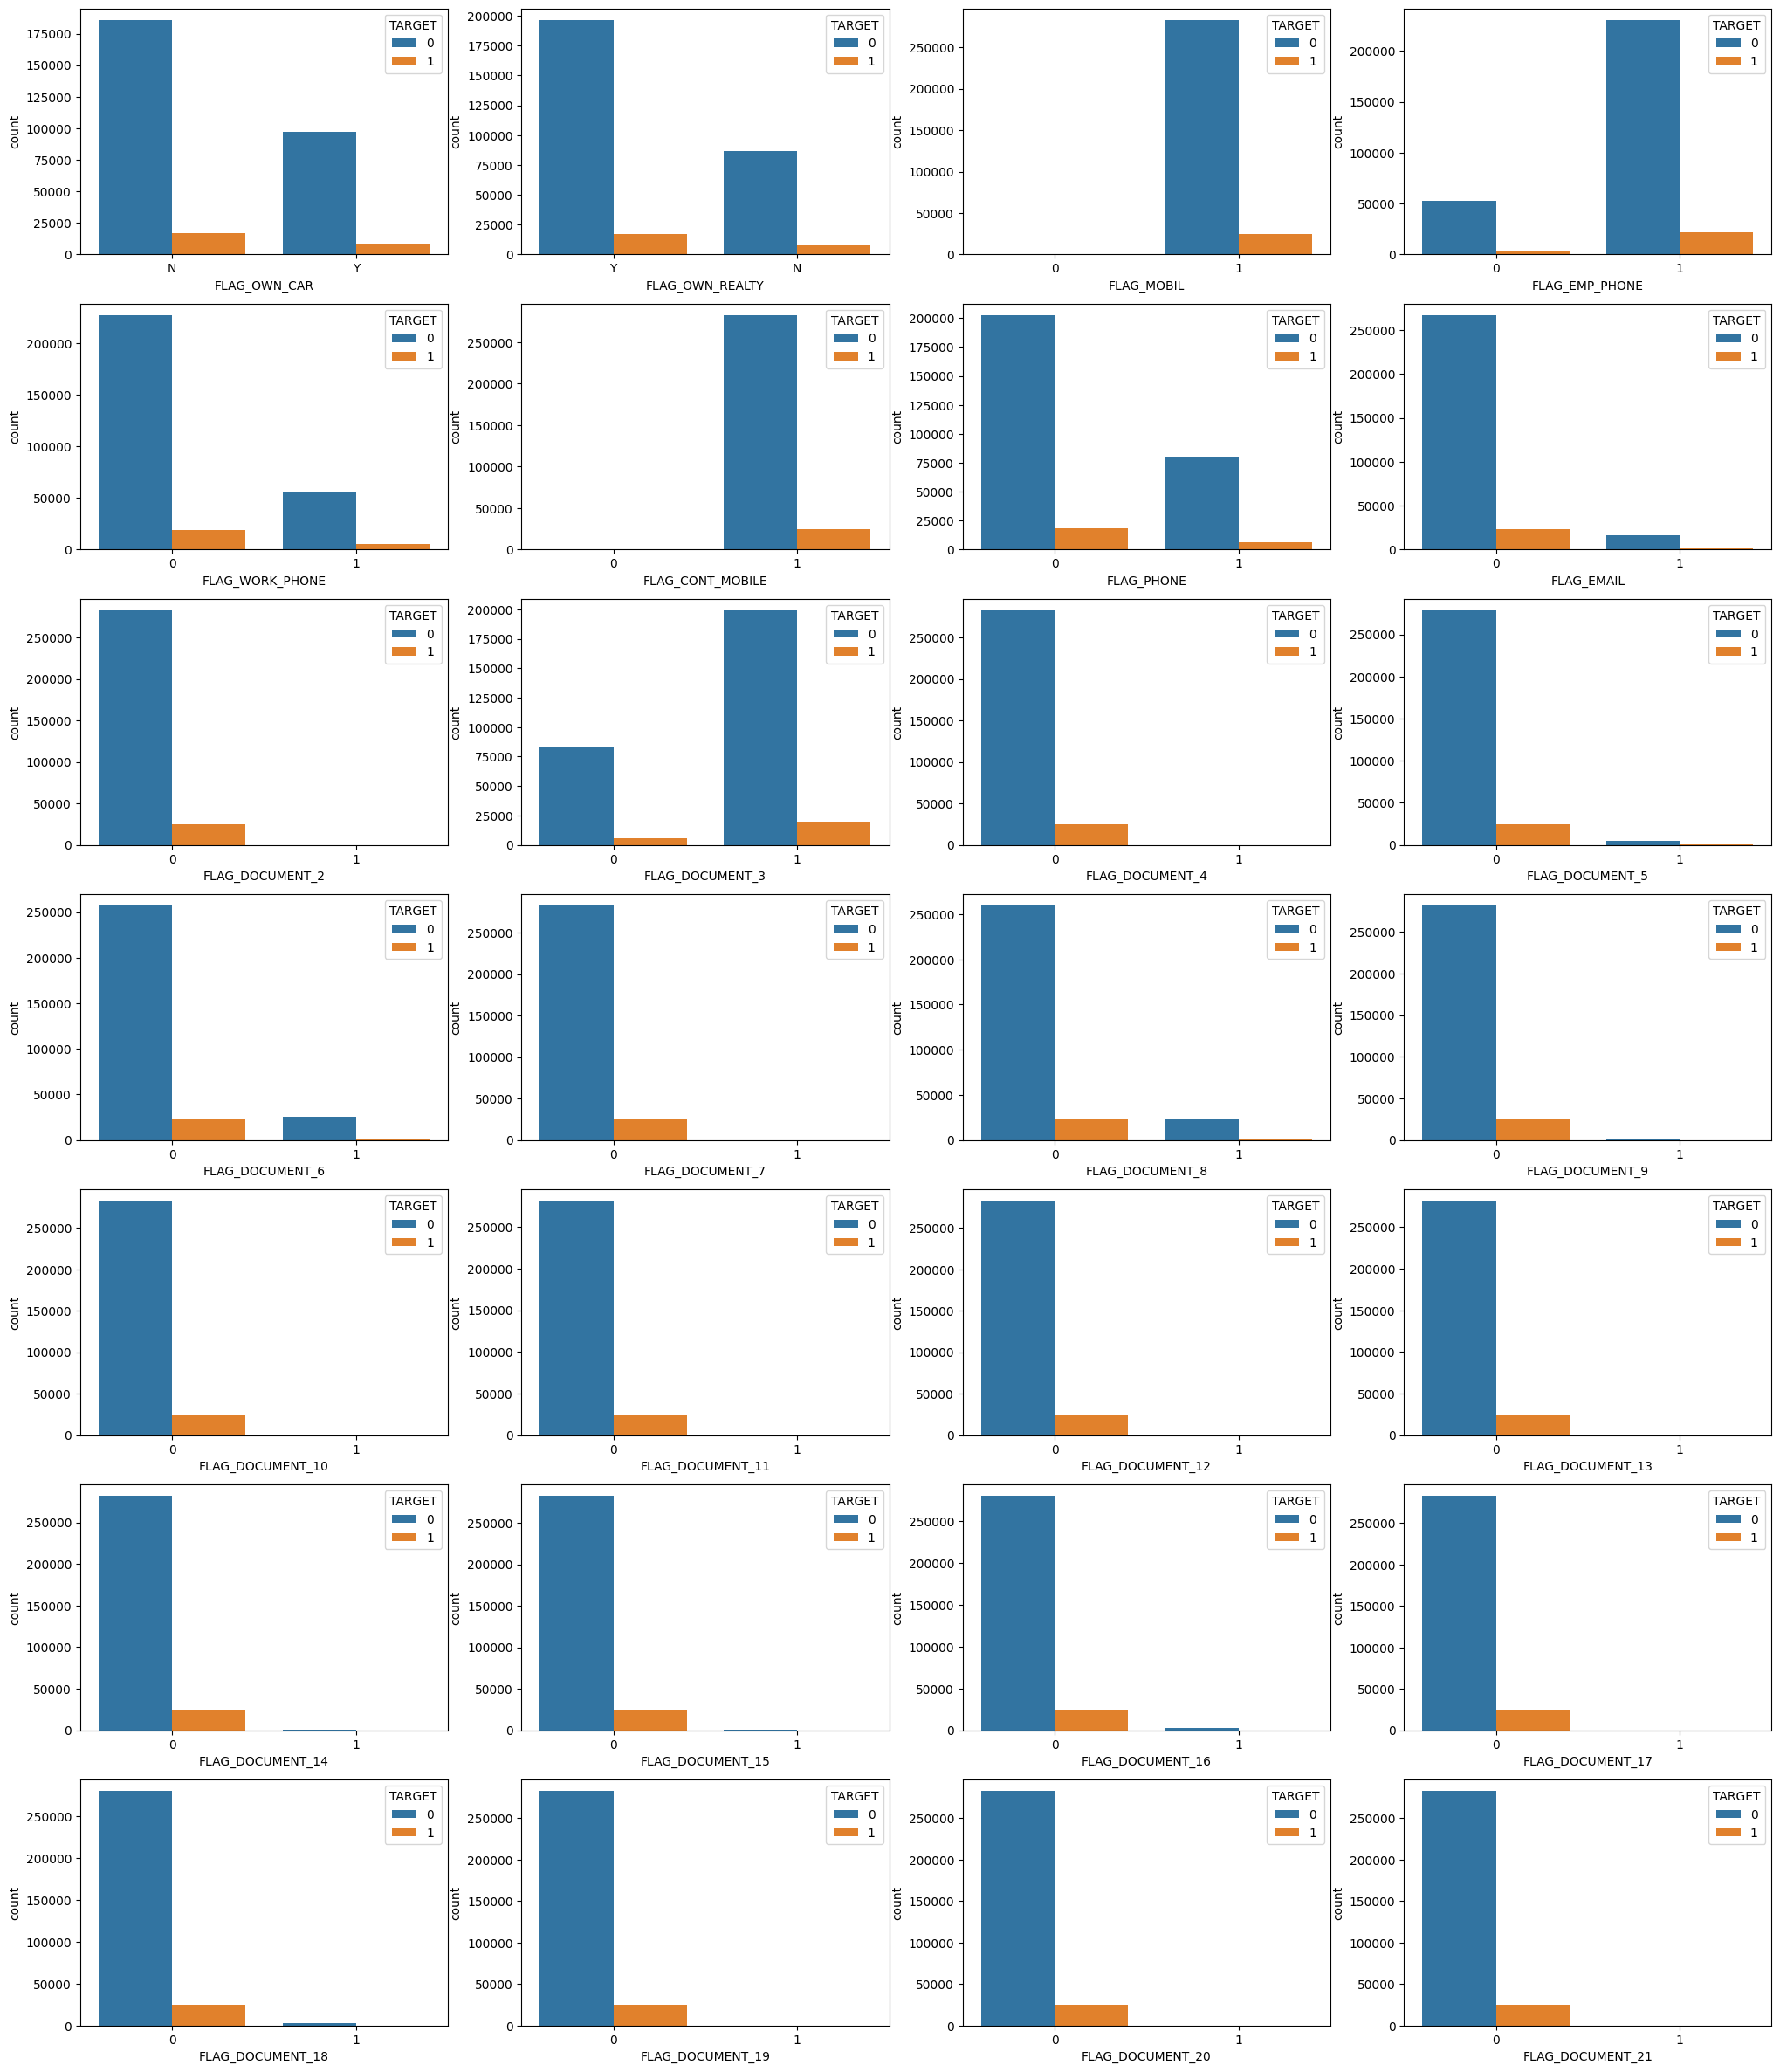

In [ ]:
plt.figure(figsize=(25,30))
for i,col in enumerate(flag_cols):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_cols, x=col, hue='TARGET')


We can see except for the first 8 plots, those who have submitted the documents are majorly non-defaulters. The most striking is document 3. Now we will find a correlation of the first 8 flagged columns with target.

In [11]:
app_missing_rmvd['FLAG_OWN_CAR'] = app_missing_rmvd['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
app_missing_rmvd['FLAG_OWN_REALTY'] = app_missing_rmvd['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
app_missing_rmvd

#Thecolumns which had string 'Y' or 'N' values are converted to float 0 or 1 respectively, to frame a correlation.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

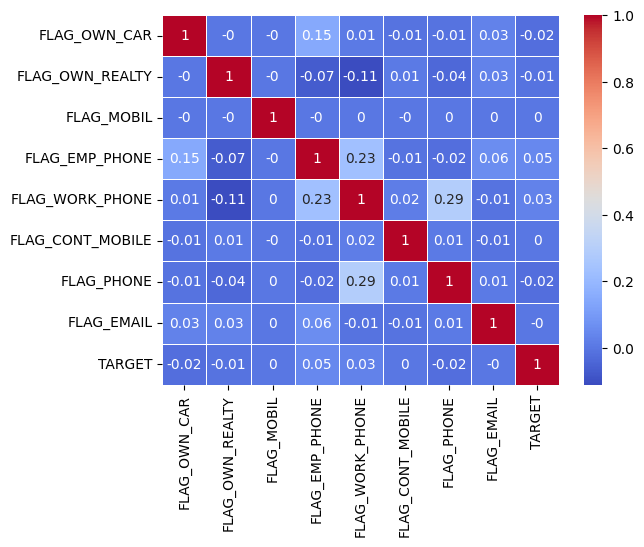

In [12]:
flag_corr=['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','TARGET']

flag_corr_df=round(app_missing_rmvd[flag_corr].corr(),2)
sns.heatmap(data=flag_corr_df,cmap='coolwarm', linewidths=.5, annot=True)

Since the significant correlation is >0.8 and <-0.8, none of the flag columns are having a significant effect on target. Hence, these columns are dropped.

In [13]:
app_flag_rmvd=app_missing_rmvd.drop(['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21'], axis=1)

app_flag_rmvd.shape

(307511, 45)

Checking the correlation of EXT columns with target

<Axes: >

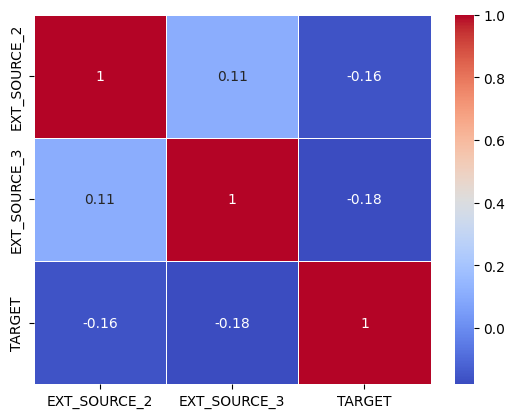

In [14]:
sns.heatmap(data=round(app_flag_rmvd[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2), cmap='coolwarm', linewidths=0.5, annot=True)

Since the above EXT columns also have very less correlation with Traget, they are also dropped.


In [25]:
app_ext_removed=app_flag_rmvd.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
app_ext_removed.shape

(307511, 43)

FEATURE ENGINEERING

Now let's see the percentage of missing values in each column.

In [26]:
app_ext_removed.isnull().sum().sort_values()/app_ext_removed.shape[0]*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

MISSING IMPUTATION

Filling the missing values in CNT_FAM_NUMBERS Column

In [27]:
app_ext_removed['CNT_FAM_MEMBERS']=app_ext_removed['CNT_FAM_MEMBERS'].fillna((app_ext_removed['CNT_FAM_MEMBERS'].mode()[0]))

In [28]:
app_ext_removed['CNT_FAM_MEMBERS'].isnull().sum()

0

Filling the missing values in OCCUPATION_TYPE column

In [29]:
app_ext_removed['OCCUPATION_TYPE']=app_ext_removed['OCCUPATION_TYPE'].fillna((app_ext_removed['OCCUPATION_TYPE'].mode()[0]))

In [30]:
app_ext_removed['OCCUPATION_TYPE'].isnull().sum()

0

Filling the missing values in NAME_TYPE_SUITE column

In [31]:
app_ext_removed['NAME_TYPE_SUITE']=app_ext_removed['NAME_TYPE_SUITE'].fillna((app_ext_removed['NAME_TYPE_SUITE'].mode()[0]))

In [32]:
app_ext_removed['NAME_TYPE_SUITE'].isnull().sum()

0

Filling the missing values in AMT-ANNUITY column. Since this is a numerical column we can use either the mean/median to fill the null values. Here I will use mean.

In [33]:
app_ext_removed['AMT_ANNUITY']=app_ext_removed['AMT_ANNUITY'].fillna((app_ext_removed['AMT_ANNUITY'].mean()))

In [34]:
app_ext_removed['AMT_ANNUITY'].isnull().sum()

0

In [35]:
amt_req_col = []

for col in app_ext_removed.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [38]:
for col in amt_req_col:
    app_ext_removed[col] = app_ext_removed[col].fillna((app_ext_removed[col].median()))

In [39]:
app_ext_removed['AMT_GOODS_PRICE'] = app_ext_removed['AMT_GOODS_PRICE'].fillna((app_ext_removed['AMT_GOODS_PRICE'].median()))

In [40]:
app_ext_removed.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_GOODS_PRICE             